<a href="https://colab.research.google.com/github/himaniarora117/CODSOFT-JULY/blob/main/Codsoft_task2_Credit_card_fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing and importing the dataset

In [1]:
#install kaggle
!pip install -q kaggle

In [16]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himaniarora117","key":"23d2a3f79f8f59e65c0606e7aea5a580"}'}

In [17]:
#create a kaggle folder
!mkdir -p ~/.kaggle

In [18]:
#copy the kaggle.json file to the folder created
!cp kaggle.json ~/.kaggle/

In [19]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [20]:
#to list all datasets in kaggle
! kaggle datasets list

ref                                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                          Global Country Information Dataset 2023             23KB  2023-07-08 20:37:33          11948        487  1.0              
nelgiriyewithana/global-youtube-statistics-2023                       Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           3978        141  1.0              
joebeachcapital/global-earth-temperatures                             Global Earth Temperatures                           33KB  2023-08-09 06:21:51            823         30  1.0              
arnavsmayan/netflix-userbase-datase

In [21]:
! kaggle datasets download -d kartik2112/fraud-detection

 97% 196M/202M [00:02<00:00, 98.7MB/s]
100% 202M/202M [00:02<00:00, 97.9MB/s]


In [22]:
! unzip fraud-detection.zip

Archive:  fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


**Importing the libraries**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px


In [24]:
sns.set(rc = {'figure.figsize':(15,8)})
df=pd.read_csv('fraudTrain.csv')
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [27]:
np.percentile(df['amt'],99)

545.9926000000002

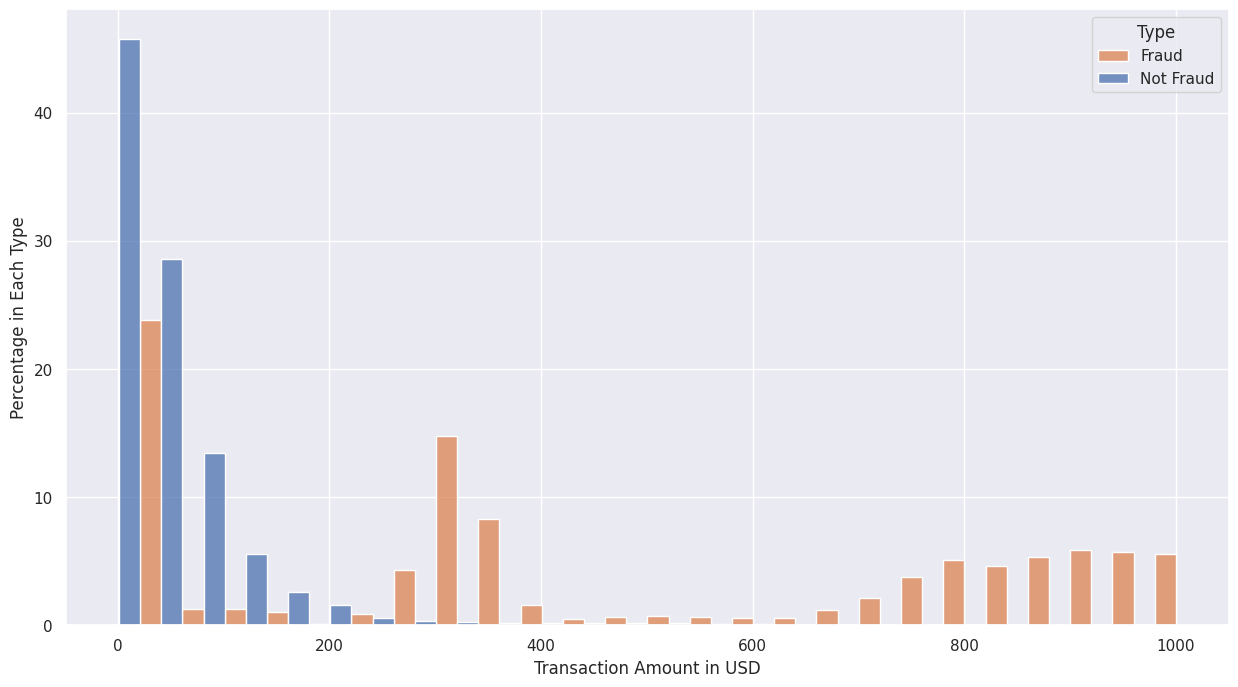

In [28]:
#amount vs fraud
wx=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
wx.set_ylabel('Percentage in Each Type')
wx.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

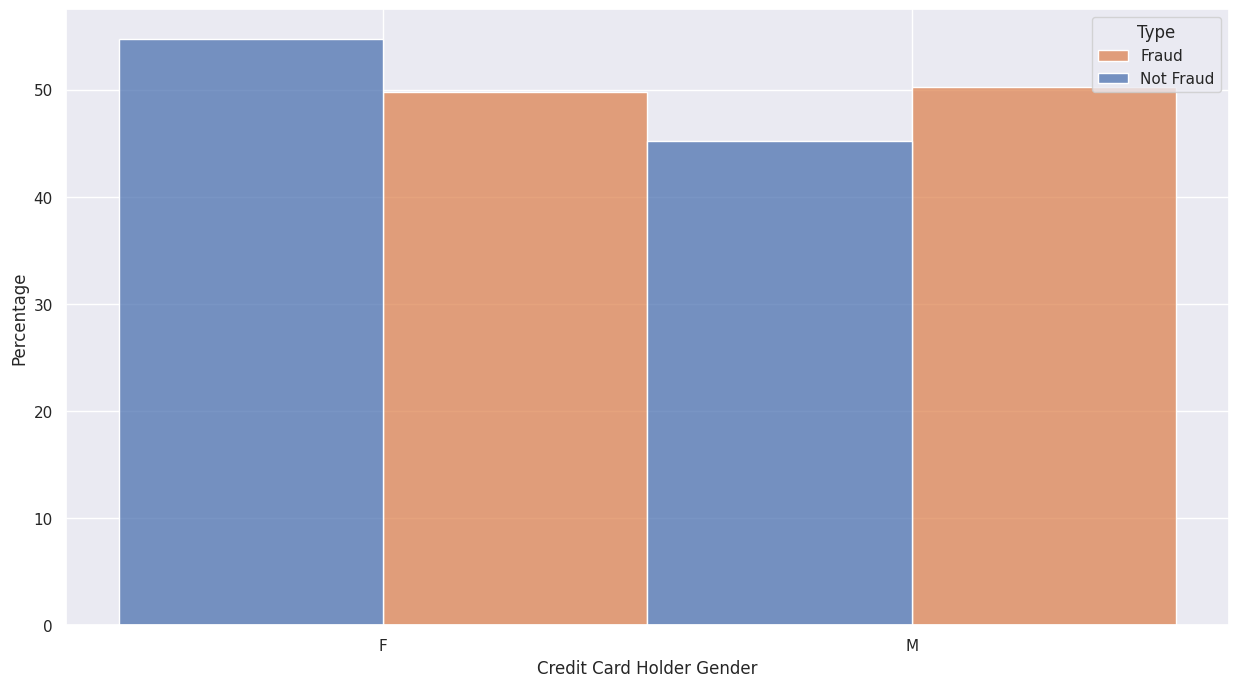

In [30]:
#Gender vs Fraud
wx=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
wx.set_ylabel('Percentage')
wx.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

**Calculating the percentage difference**

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

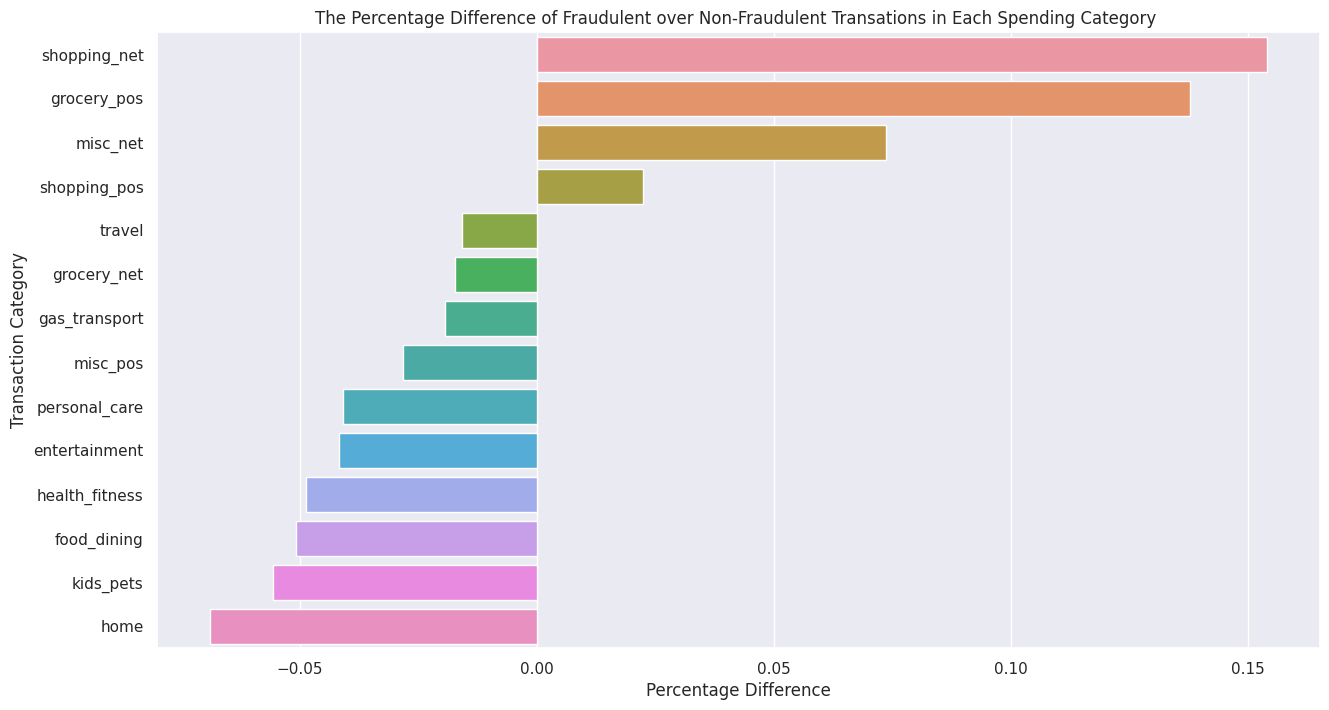

In [31]:

w=df[df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
w.columns=['category','not fraud percentage']

v=df[df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
v.columns=['category','fraud percentage']
wv=w.merge(v,on='category')
wv['diff']=wv['fraud percentage']-wv['not fraud percentage']

wx=sns.barplot(y='category',x='diff',data=wv.sort_values('diff',ascending=False))
wx.set_xlabel('Percentage Difference')
wx.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

**Age distribution in fraudulent vs non fraudulent transactions**

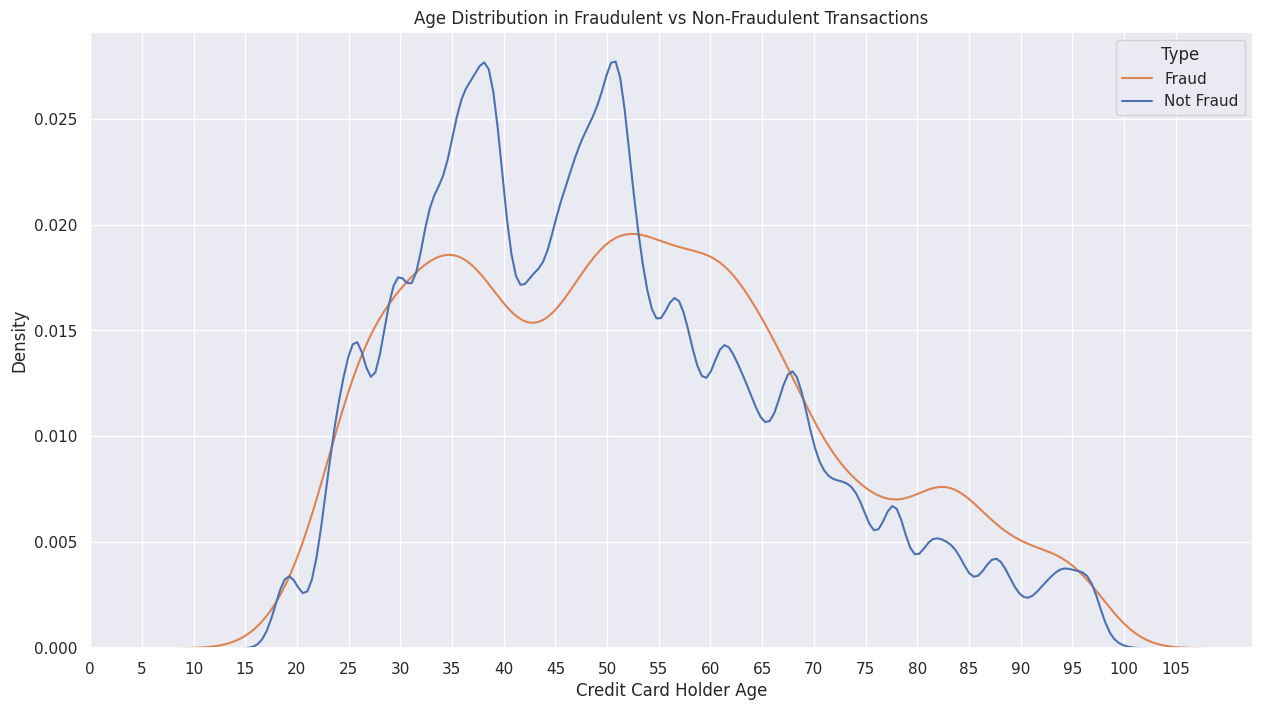

In [32]:
#age vs fraud
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
wx=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
wx.set_xlabel('Credit Card Holder Age')
wx.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

**Time in a day vs Fraud**

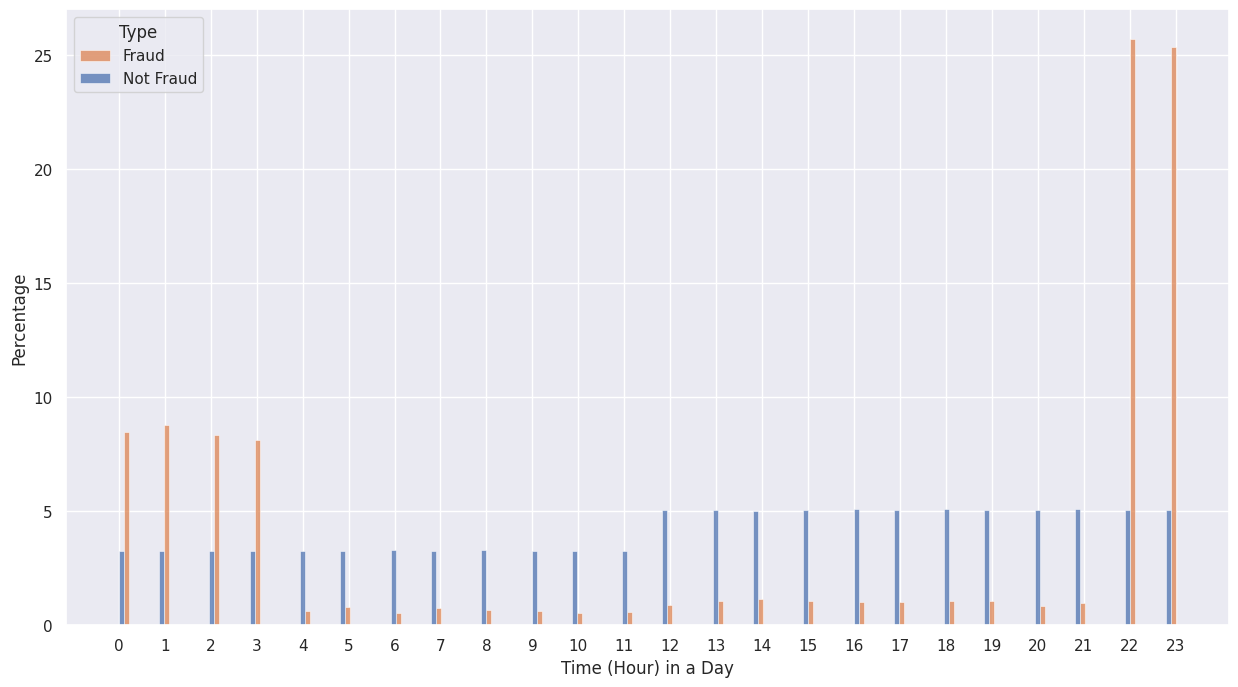

In [33]:
#time in a day vs fraud
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
wx=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
wx.set_ylabel('Percentage')
wx.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

<ipython-input-34-d69a9f4ca842>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  wx.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


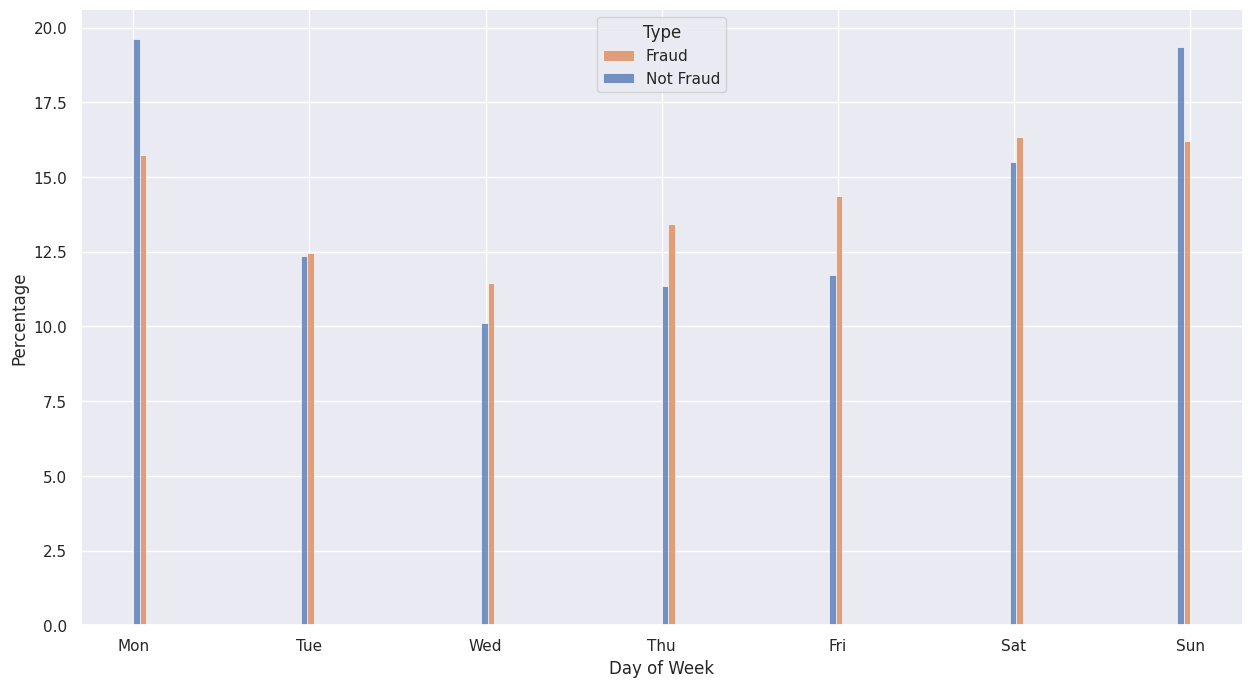

In [34]:
#day of week vs fraud
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
wx=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
wx.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
wx.set_ylabel('Percentage')
wx.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

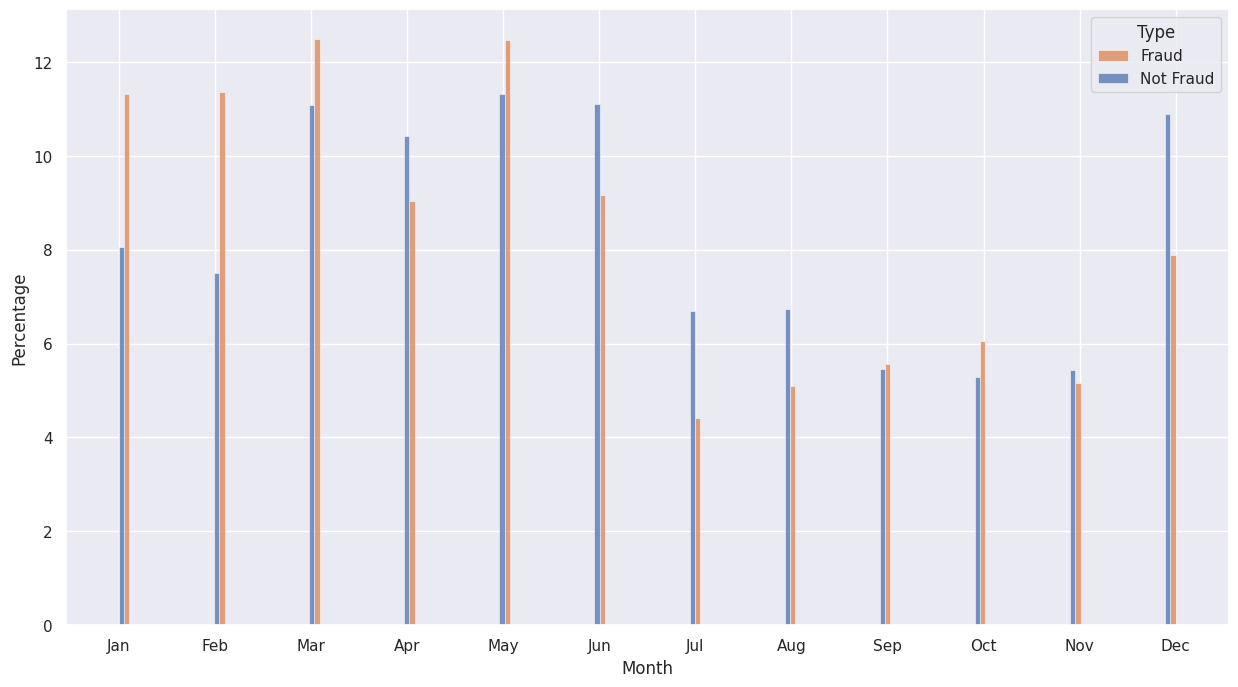

In [35]:
#month vs fraud
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
wx=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
wx.set_ylabel('Percentage')
wx.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
wx.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

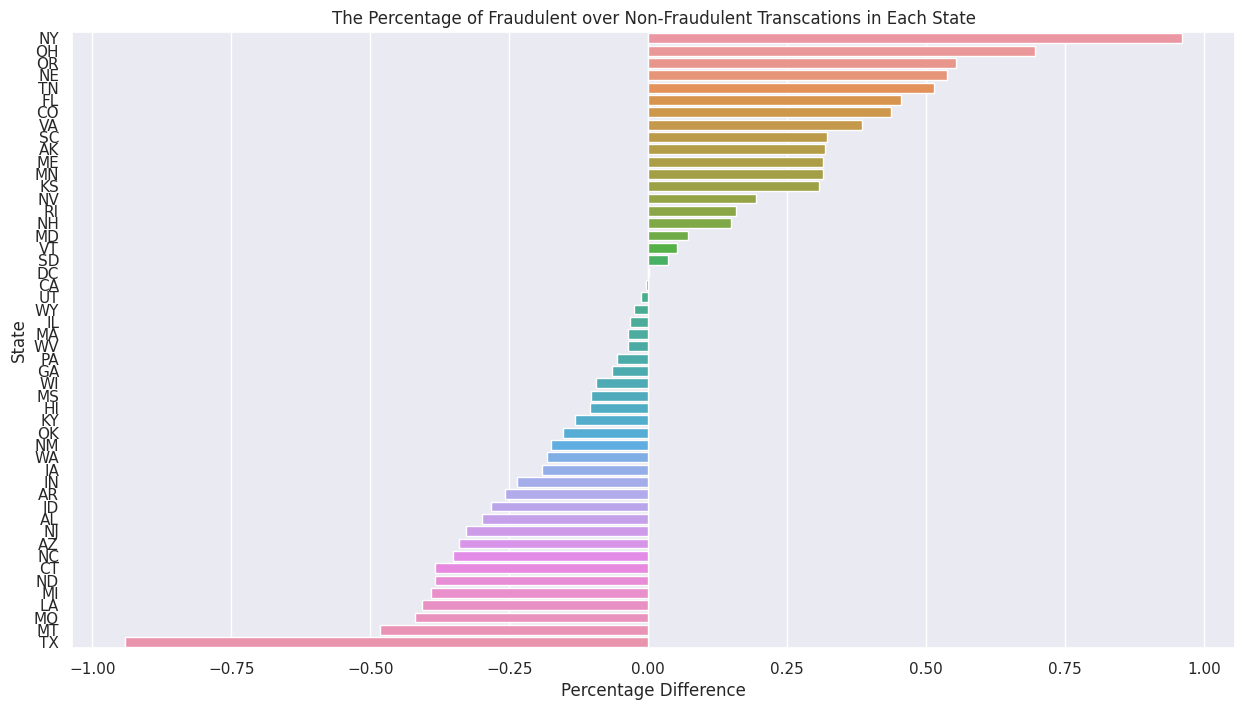

In [36]:
w=df['state'][df.is_fraud==0].value_counts(normalize=True)
w=w.to_frame()
w=w.reset_index()
w.columns = ['State', 'Per']

v=df['state'][df.is_fraud==1].value_counts(normalize=True)
v=v.to_frame()
v=v.reset_index()
v.columns = ['State', 'Per']
merged=w.merge(v,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

wx1=sns.barplot(data=merged, x='diff',y='State')
wx1.set_xlabel('Percentage Difference')
wx1.set_ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')


In [37]:
#subset the training data to include only the features that we need
train=df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#convert category to dummy variables
train=pd.get_dummies(train, drop_first=True)
y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis='columns').values

In [38]:
#let us do the same to the testing dataset
test=pd.read_csv('fraudTest.csv')
test['age']=dt.date.today().year-pd.to_datetime(test['dob']).dt.year
test['hour']=pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['day']=pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek
test['month']=pd.to_datetime(test['trans_date_trans_time']).dt.month
test=test[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#convert category to dummy variables
test=pd.get_dummies(test, drop_first=True)
y_test=test['is_fraud'].values
X_test=test.drop("is_fraud", axis='columns').values

In [39]:
#logistic regression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
model=LogisticRegression()
model.fit(X_resampled,y_resampled)
predicted=model.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.05      0.75      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719

Confusion matrix:
 [[524662  28912]
 [   534   1611]]
Share of Non-Fraud in Test Data: 0.9961


In [40]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=5)
model2.fit(X_resampled,y_resampled)
predicted=model2.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.88      0.73      0.80      2145

    accuracy                           1.00    555719
   macro avg       0.94      0.86      0.90    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[553369    205]
 [   582   1563]]
Share of Non-Fraud in Test Data: 0.9961
